### Wstęp do Uczenia Maszynowego 
##### Laboratorium 9

### 1. Przygotowanie danych

a ) wartości odstające

- boxplot
- wartości poniżej/powyżej rozkładu 3 $\sigma$


b) braki danych

- imputacja poprzez średnią lub częstość (zależne od typu zmiennej)

### 2. Pipeline (scikit-learn)

<img src="pipeline.png" alt="drawing" width="600"/>

*https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("titanic.csv")
y = df.survived
X = df.drop(["survived"], axis = 1)

In [3]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Zadanie 1
-----
Przyjrzyj się danym `titanic`. Czy są wymagają jakiegoś wstępnego przygotowania?

In [4]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(6), object(7)
memory usage: 133.1+ KB


In [5]:
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Zadanie 2
-----
Przygotuj wektor `numerical_features` i `categorical_features`, które będą odpowiednio zawierały nazwy kolumn numerycznych i kategorycznych.

In [6]:
numerical_features = list(X.dtypes[(X.dtypes != 'object') & (X.dtypes != 'category')].index)
categorical_features = list(X.dtypes[(X.dtypes == 'object') | (X.dtypes == 'category')].index)

print('Numerical features:', numerical_features)
print('Categorical features:', categorical_features)

Numerical features: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'body']
Categorical features: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


----

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

### Zadanie 3
-----
Przygotuj `pipeline` dla zmiennych kategorycznych. 
Użyj `SimpleImputer()` o startegii wyboru najczęstszej kategorii.
Użyj `OneHotEncoder()` o strategii 'ignore' dla argumentu 'handle_unknown'.

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

------
#### Column Transformer + Model

In [9]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [10]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeClassifier())
])

In [11]:
pipeline

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare', 'body']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'sex', 'ticket',
                                                   'cabin', 'embarked', 'boat',
                                                   'home.dest'])])),
                ('tree', DecisionTreeClassifier())])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
pipeline.fit(X_train, y_train)

print('Training set accuracy:', np.round(pipeline.score(X_train, y_train), 4))
print('Test set accuracy:' , np.round(pipeline.score(X_test, y_test), 4))

Training set accuracy: 1.0
Test set accuracy: 0.9542


### Zadanie 4
-----
Wczytaj zbiór danych `pima.csv`. Przyjrzyj się się zmiennej `BloodPressure`. Narysuj jej rozkład względem y.

In [13]:
pima = pd.read_csv("pima.csv")

In [14]:
y = pima.Outcome
X = pima.drop(["Outcome"], axis = 1)

<Axes: xlabel='BloodPressure', ylabel='Count'>

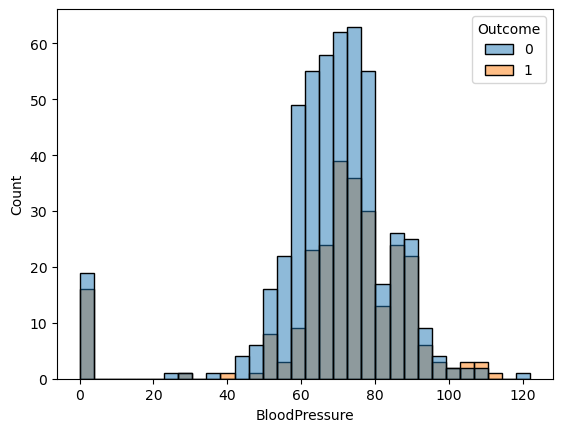

In [15]:
import seaborn as sns
sns.histplot(x = 'BloodPressure', hue = 'Outcome', data = pima)

### Zadanie 5
-----
a) Zastąp wartości 0 zmiennej `BloodPressure` jako braki danych. Podziel dane na zbiór treningowy i testowy w proporcji 7:3. Następnie przygotuj `pipeline`, który będzie składał się z metody imputacji danych poprzez średnią z pozostałych obserwacji. Kolejnym elementem `pipeline` będzie stworzenie modelu drzewa. Wylicz miarę `accuracy` na zbiorze treningowym i testowym.

b) Do `pipeline` dodajmy optymalizację parametrów używając `GridSearch` z 3-krotną krowswalidacją. Rozważmy poszczególne parametry i ich wartości:
- maksymalna głębokość [5, 6, ..., 12]
- minimalna liczba obserwacji w liściu [3, 4, ..., 9]

c) Jakie parametry okazały się optymalne? Wylicz miarę dokładności oraz ROC AUC. Porównaj wyniki dla optymalnych parametrów z bazowym modelem drzewa.

In [17]:
X.BloodPressure[X.BloodPressure == 0] = np.nan

In [18]:
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy = 'mean')),
    ('tree', DecisionTreeClassifier())
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer()),
                ('tree', DecisionTreeClassifier())])

In [21]:
train_score = pipeline.score(X_train, y_train)
print('Accuracy score on the training set:', np.round(train_score, 5))

test_score = pipeline.score(X_test, y_test)
print('Accuracy score on the training set:', np.round(test_score, 5))


Accuracy score on the training set: 1.0
Accuracy score on the training set: 0.69697


In [22]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('imputation', SimpleImputer()),
    ('tree', DecisionTreeClassifier())
])

params = {
    'imputation__strategy': ['mean'],
    'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

grid_pipeline = GridSearchCV(pipeline,
                             cv = 3,
                             param_grid = params)

In [23]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'imputation__strategy': ['mean'],
                         'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]})

In [24]:
grid_pipeline.best_params_

{'imputation__strategy': 'mean',
 'tree__max_depth': 12,
 'tree__min_samples_leaf': 9}

In [25]:
grid_pipeline.score(X_test, y_test)

0.7445887445887446

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, grid_pipeline.predict_proba(X_test)[:,1])

0.7801799440950384

In [ ]:
# Model drzewa o parametrach domyślnych
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
tree.score(X_test, y_test)

0.683982683982684

In [29]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

0.7171558350803633